In [94]:
using Plots, BenchmarkTools, Sobol

In [95]:
function bit_reversing( n :: Int64 ) :: Float64
    
    k = 25        :: Int64
    miroir = 0.0  :: Float64
    deci = n      :: Int64
    
    @assert deci < typemax(Int64)
    while (k >= 0)
       div = 2^k
       if (deci÷div == 1)
          miroir += 2.0^(-k-1)
          deci = deci - div
       end
       k = k-1
    end
    
    miroir

end

bit_reversing (generic function with 1 method)

In [96]:
[bit_reversing(k) for k in 0:10]

11-element Array{Float64,1}:
 0.0   
 0.5   
 0.25  
 0.75  
 0.125 
 0.625 
 0.375 
 0.875 
 0.0625
 0.5625
 0.3125

In [101]:
function trinary_reversing( n :: Int64 ) :: Float64

    k = 16 :: Int64
    miroir = 0.0 :: Float64
    deci = n :: Int64
    
    @assert deci < typemax(Int64)
     
    while (k >= 0)
       div = 3^k
       if (deci÷div == 1)
          miroir += 3.0^(-k-1)
          deci = deci - div
       elseif (deci÷div == 2)
          miroir += 2 * 3.0^(-k-1)
          deci = deci - 2 * div
       end
       k = k-1
    end

    
    miroir

end

trinary_reversing (generic function with 1 method)

In [115]:
s = SobolSeq(2)

2-dimensional Sobol sequence on [0,1]^2

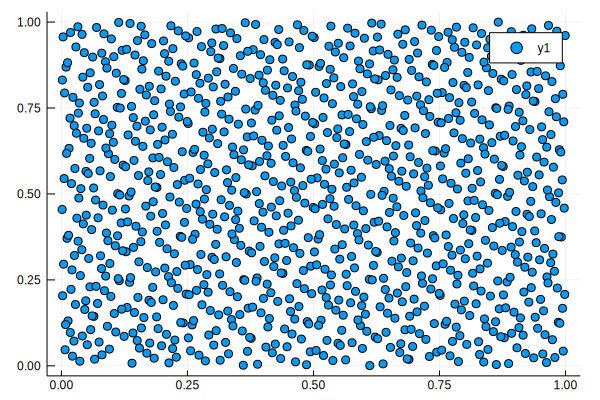

In [126]:
n = 1000
points = zeros(Float64,(2,n))
for i = 1:n
    points[:,i] .= next!(s)
end
scatter(points[1,:], points[2,:])

In [102]:
[trinary_reversing(k) for k in 1:10]

10-element Array{Float64,1}:
 0.3333333333333333  
 0.6666666666666666  
 0.1111111111111111  
 0.4444444444444444  
 0.7777777777777777  
 0.2222222222222222  
 0.5555555555555556  
 0.8888888888888888  
 0.037037037037037035
 0.37037037037037035 

In [103]:
function penta_reversing( n :: Int64 ) :: Float64

    k = 11 :: Int64
    miroir = 0.0 :: Float64
    deci = n :: Int64
    
    @assert deci < typemax(Int64)
    while (k >= 0)
       div = 5^k
       if (deci÷div == 1) 
          miroir +=  5.0^(-k-1)
          deci = deci - div
       elseif (deci÷div == 2) 
          miroir +=  2 * 5.0^(-k-1)
          deci = deci - 2 * div
       elseif (deci÷div == 3) 
          miroir +=  3.0^(-k-1)
          deci = deci - 3 * div
       elseif (deci÷div == 4) 
          miroir += 4 * 5.0^(-k-1)
          deci = deci - 4 * div
       end
       k = k-1
    end
    
    miroir

end

penta_reversing (generic function with 1 method)

In [104]:
[penta_reversing(k) for k in 1:10]

10-element Array{Float64,1}:
 0.2                
 0.4                
 0.3333333333333333 
 0.8                
 0.04               
 0.24000000000000002
 0.44               
 0.3733333333333333 
 0.8400000000000001 
 0.08               

In [105]:
"""
Solve ``P(x) = \\frac{2\\pi R}{k} ``

```math
P(x) = \\int_0^x (1 + \\alpha cos(k y)) dy
```
```math
P(x) = x + \\frac{\\alpha}{k} sin (k x)
```

"""
function dichotomie(R)
    
    kx, alpha = 0.5, 0.1
    eps = 1e-12
    a, b = 0, 2π/kx
    while true
        x = 0.5 * (a+b)
        D = ( kx * x + alpha * sin(kx*x)) / 2π
        if ( D<R-eps )
           a = x
        elseif ( D>R+eps )
           b = x
        else
           return x
        end
    end
end

dichotomie

In [106]:
"""

Input r is a random number ``\\in [0,1]``

```math
    f(x) = 1 + \\alpha cos(k x)
```
on some domain ``[0, 2\\pi/k]``

Solve the equation ``P(x)-r=0`` with Newton’s method

```math
    x^{n+1} = x^n – (P(x)-(2\\pi r / k)/f(x) 
```

with 
```math
P(x) = \\int_0^x (1 + \\alpha cos(k y)) dy
```
```math
P(x) = x + \\frac{\\alpha}{k} sin (k x)
```
"""
function newton(r)
    x0, x1 = 0.0, 1.0
    alpha, k = 0.1, 0.5
    r *= 2 * pi / k
    while (abs(x1-x0) > 1e-12)
        p = x0 + alpha * sin( k * x0) / k 
        f = 1 + alpha * cos( k * x0)
        x0, x1 = x1, x0 - (p - r) / f
    end
    x1
end

newton

In [107]:
?newton

search: newton



Input r is a random number $\in [0,1]$

$$
    f(x) = 1 + \alpha cos(k x)
$$

on some domain $[0, 2\pi/k]$

Solve the equation $P(x)-r=0$ with Newton’s method

$$
    x^{n+1} = x^n – (P(x)-(2\pi r / k)/f(x) 
$$

with 

$$
P(x) = \int_0^x (1 + \alpha cos(k y)) dy
$$

$$
P(x) = x + \frac{\alpha}{k} sin (k x)
$$


In [108]:
@btime newton(0.9)

  201.969 ns (0 allocations: 0 bytes)


11.418335561722728

In [109]:
?dichotomie

search: dichotomie



Solve $P(x) = \frac{2\pi R}{k}$

$$
P(x) = \int_0^x (1 + \alpha cos(k y)) dy
$$

$$
P(x) = x + \frac{\alpha}{k} sin (k x)
$$


In [110]:
@btime dichotomie(0.9)

  604.439 ns (0 allocations: 0 bytes)


11.418335561725414

In [111]:
function landau( nbpart :: Int64)
    
   xp = Float64[]
   vp = Float64[]
    
   s = SobolSeq(2)

   for k=0:nbpart-1

      v = sqrt(-2 * log( (k+0.5)/nbpart))
      r1, r2 = next!(s)
      θ = r1 * 2π
      push!(xp,  newton(r2))
      push!(vp,  v * sin(θ))

   end

   xp, vp
    
end

landau (generic function with 1 method)

In [112]:
xp, vp = landau(100000);

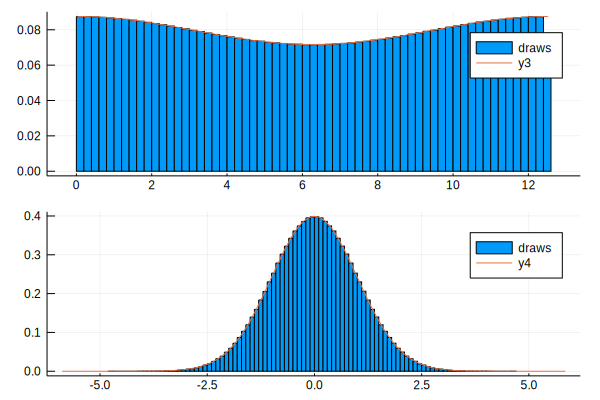

In [113]:
p = histogram([xp,vp], normalize=true, bins = 100,  layout=(2,1), lab = "draws")
plot!(p[1,1], x-> (1+0.1*cos(0.5*x))/4π, 0., 4π)
plot!(p[2,1], x-> (exp(-x^2/2))/sqrt(2π), -6, 6)